# The Spark Foundation - Data Science & Business Analytics Internship

# NAME :- MANISH KUMAR

# Batch :- GRIPJULY2021

# Task 1:- Prediction using Supervised Machine Learning

### objective :- predict the percentage of an student based on the no. of study hours.

### This is a linear regression task as it invloves just 2 variables.

### What will be predicted score if a student studies for 9.25 hrs/day?

# Importing all necessary libraries for this task

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Reading the dataset to perform operation

In [3]:
dataset = pd.read_csv('student_scores - student_scores.csv')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.shape

(25, 2)

In [5]:
(25, 2)

(25, 2)

# Data Analysis

In [6]:
#fetching top 5 records from the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [9]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
#checking for null variables
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data visualization

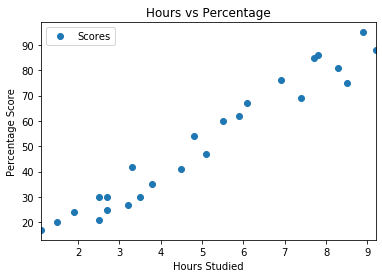

In [12]:
#plotting the distribution of hours and scores
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### From the above graph,there is a linear relationship between the hours studied and percentage of scores obtained with positive slope.Hence the percentage of scores increases if studied hours increases. 

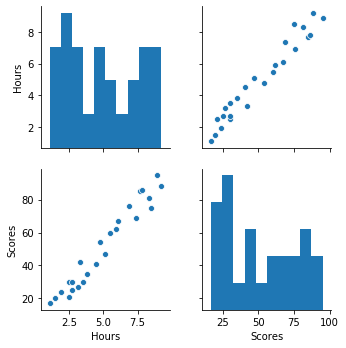

In [13]:
sns.pairplot(dataset)

In [14]:
correlation= dataset.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


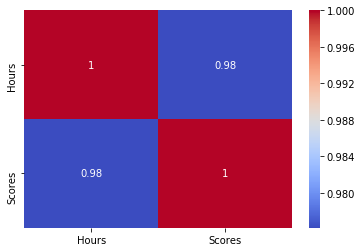

In [15]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Training a Linear Regression Model


Let's now begin to train out regression model.we will need to first split up the marks_data into independentvariable as x array that contains the features to train on and independent variables as y array with the target variable. 

In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Train Test Split

In [17]:
#splitting the data into an training set and a testing set.
#we will trai out model on the training set and then use the test set to evaluate the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [19]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

# Creating and Training the Model

In [20]:
#importing linear regression from sklearn.linear_model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [21]:
#printing the intercept
Intercept=regressor.intercept_
Intercept

2.018160041434683

In [22]:
print(regressor.coef_)

[9.91065648]


# Predictions from our Model

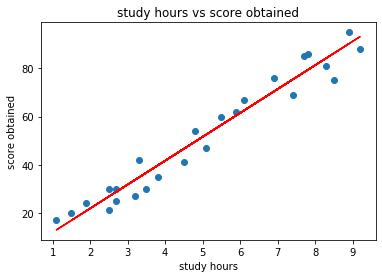

In [23]:
line=regressor.coef_*X+Intercept

plt.scatter(X,y)
plt.xlabel("study hours")
plt.ylabel("score obtained")
plt.title("study hours vs score obtained")
plt.plot(X,line,color="red");

# Predicted scores

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Actual Scores

In [25]:
y_test

array([20, 27, 69, 30, 62])

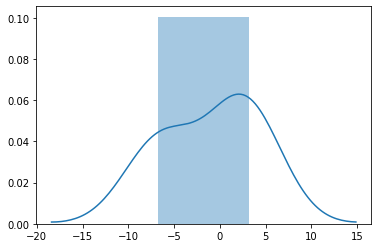

In [26]:
#residual histogram
sns.distplot(y_test-y_pred)

# Regression Evaluation Metrics


In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Prediction of scores when student studies for 9.25 hours

In [29]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
predicted_score=regressor.predict(test)
print("No of hours  = {}".format(hours))
print("predicted score = {}".format(predicted_score[0]))

No of hours  = 9.25
predicted score = 93.69173248737538


# Conclusion

### Hence if a student is involved in study for 9.25 hours a day, then there is a possibility that the percentage would comes out to be 93.69173248737538

# Thanks to The Sparks Foundation For the opportunity